**Задание:**

Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

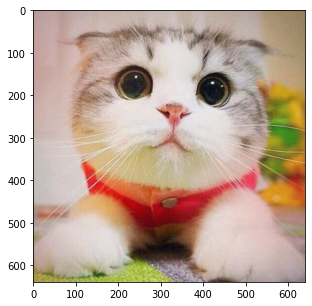

In [13]:
img = imageio.imread('/content/chat_avatar-136.jpg')
plt.figure(figsize=(5,5))
plt.imshow(img);

In [12]:
# Фильтр изменения тона

In [9]:
from skimage.color import rgb2hsv, hsv2rgb
img_hsv = rgb2hsv(img)

In [10]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] /= 2
img_new = hsv2rgb(img_hsv_new)

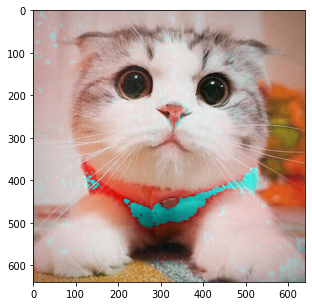

In [14]:
plt.figure(figsize=(5, 5))
plt.imshow(img_new)

In [16]:
# Фильтр искажения цвета
win_size = (5, 5)
w = np.array([
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1]
              ])

out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1,
     img.shape[2]),
    dtype=np.float32
)
for i in range(out_img.shape[0]):
  for j in range(out_img.shape[1]):
    for k in range(out_img.shape[2]):
      x = img[i: i + w.shape[0], j: j + w.shape[1], k]
      out_img[i, j, k] = np.sum(w * x)

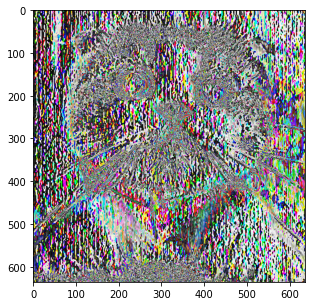

In [17]:
out_img = out_img.astype(np.uint8)
plt.figure(figsize=(5,5))
plt.imshow(out_img);

In [18]:
# Фильтр размытия
win_size = (11, 11)
w = np.ones(win_size, dtype=np.float32)
w /= np.sum(w)

out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1,
     img.shape[2]),
    dtype=np.float32
)
for i in range(out_img.shape[0]):
  for j in range(out_img.shape[1]):
    for k in range(out_img.shape[2]):
      x = img[i: i + w.shape[0], j: j + w.shape[1], k]
      out_img[i, j, k] = np.sum(w * x)

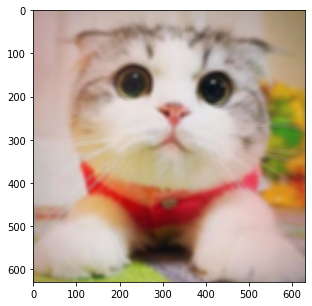

In [19]:
out_img = out_img.astype(np.uint8)
plt.figure(figsize=(5,5))
plt.imshow(out_img);